# Análisis textual de La Voz del Sur y Letra Fría

## Data cleaning La Voz del Sur

In [10]:
!pip install pandas
import pandas as pd
# pd.read_csv is for .cvs files, but this one is Excel so it's pd.read_excel, followed by the file route.
# When reading Excel files I usually open them first in Excel to get familiar with the data structure.
# After commas we can add additional instructions, such as the sheet name. We are not using the first two rows, so we are skipping them.

# Loading every file as separate dataframes. I'm identifying them with distinct names, but we will be combining them into a single larger dataframe in a bit.
#La Voz del Sur
#dfvoz = pd.read_csv('scraped data/articulos_lavozdelsur.csv')
dfvoz = pd.read_csv('articulos_lavozdelsur.csv')

In [11]:
# First we import pandas, our library to work with data sets
import pandas as pd
# This below it's optional, but I like to add it so it shows me all columns in the preview, specially useful for wide tables
pd.options.display.max_columns = None

# This below are optional too but I don't think I'll be using it
#remove scientific notation
#pd.options.display.float_format = '{:.2f}'.format

import re

In [12]:
# Eliminar duplicados (conservando primeros)
voz = dfvoz.drop_duplicates()
voz

,titulo,articulo,fecha,url
0,Dan Banderazo de Arranque al Operativo de Sema...,"Published on abril 12th, 2025 | by lavozsur\n\...","abril 12th, 2025",https://www.lavozdelsur.com.mx/dan-banderazo-d...
1,La Falta de Vigilancia en las Carreteras,"Published on abril 11th, 2025 | by lavozsur\n\...","abril 11th, 2025",https://www.lavozdelsur.com.mx/la-falta-de-vig...
2,Banda Real de la Montaña Lleva su Música al Fe...,"Published on abril 11th, 2025 | by lavozsur\n\...","abril 11th, 2025",https://www.lavozdelsur.com.mx/banda-real-de-l...
3,Muere un Hombre Atropellado en la Autopista Gu...,"Published on abril 10th, 2025 | by lavozsur\n\...","abril 10th, 2025",https://www.lavozdelsur.com.mx/muere-un-hombre...
4,Conforman Ayuntamiento Infantil 2025 Frente Au...,"Published on abril 9th, 2025 | by lavozsur\n\n...","abril 9th, 2025",https://www.lavozdelsur.com.mx/conforman-ayunt...
...,...,...,...,...
1051,"Toluca, Real Huescalapa y Rayos de Zapotiltic ...","Published on diciembre 27th, 2023 | by lavozsu...","diciembre 27th, 2023",https://www.lavozdelsur.com.mx/toluca-real-hue...
1052,Abren Nevado a Visitantes Para Disfrutar el Pa...,"Published on diciembre 27th, 2023 | by lavozsu...","diciembre 27th, 2023",https://www.lavozdelsur.com.mx/abren-nevado-a-...
1053,Pablo Lemus Lleva Amplia Ventaja Sobre Otros P...,"Published on diciembre 26th, 2023 | by lavozsu...","diciembre 26th, 2023",https://www.lavozdelsur.com.mx/pablo-lemus-lle...
1054,"Bajío, San José y Nuevos Valores Triunfan en l...","Published on diciembre 26th, 2023 | by lavozsu...","diciembre 26th, 2023",https://www.lavozdelsur.com.mx/bajio-san-jose-...


In [13]:
# Función para extraer los tags y limpiar el artículo
def procesar_articulo(texto):
    # Buscar los tags (ejemplo: "Tags: Chava Zamora, jalisco, ...")
    tags_match = re.search(r'Tags:\s*(.*?)(?=\n\n|$)', texto, flags=re.DOTALL | re.IGNORECASE)
    tags = tags_match.group(1).strip() if tags_match else ""

    # Eliminar la línea de tags del artículo
    texto_limpio = re.sub(r'Tags:.*?(?=\n\n|$)', '', texto, flags=re.DOTALL | re.IGNORECASE)

    # Limpieza adicional (lo que ya teníamos antes)
    texto_limpio = re.sub(r'Published on.*?by lavozsur', '', texto_limpio, flags=re.DOTALL)
    texto_limpio = re.sub(r'lavozsur Con 35 años de trayectoria.*?Jalisco\.', '', texto_limpio, flags=re.DOTALL)
    texto_limpio = re.sub(r'Comments are closed\.', '', texto_limpio, flags=re.DOTALL)
    texto_limpio = texto_limpio.strip()

    return texto_limpio, tags

# Aplicar la función y crear las nuevas columnas
voz[['articulo', 'tags']] = pd.DataFrame(voz['articulo'].apply(procesar_articulo).tolist(), index=voz.index)

# Reordenar columnas (opcional)
voz = voz[['titulo', 'articulo', 'tags', 'fecha', 'url']]
# Guardar el resultado
#voz.to_csv('vozdelsur_limpio_con_tags.csv', index=False)

In [14]:
# Función para extraer el lugar y limpiar el artículo
def extraer_lugar(texto):
    # Patrón para ciudades en mayúsculas seguidas de "JAL." o similares
    lugar_match = re.search(r'^([A-ZÁÉÍÓÚÜÑ\s]+(?:,\s*JAL\.?|\.))', texto)
    if lugar_match:
        lugar = lugar_match.group(1).strip()
        texto_limpio = texto.replace(lugar, '', 1).strip()
    else:
        lugar = ""
        texto_limpio = texto
    return texto_limpio, lugar

# Aplicar la función para extraer lugares
voz[['articulo', 'lugar']] = pd.DataFrame(voz['articulo'].apply(extraer_lugar).tolist(), index=voz.index)

# Función para verificar si contiene (ES)
def contiene_ES(texto):
    return 'yes' if '(ES)' in texto else 'no'

# Crear columna 'contiene_ES'
voz['contiene_ES'] = voz['articulo'].apply(contiene_ES)

# Reordenar columnas (opcional)
column_order = ['titulo', 'articulo', 'lugar', 'tags', 'contiene_ES', 'fecha', 'url']
voz = voz[column_order]

# Guardar el resultado
voz.to_csv('cleaned_vozdelsur.csv', index=False, encoding='utf-8-sig')

In [15]:
voz

,titulo,articulo,lugar,tags,contiene_ES,fecha,url
0,Dan Banderazo de Arranque al Operativo de Sema...,*Autoridades de los tres niveles de gobierno t...,,"Chava Zamora, jalisco, la voz del sur de jalis...",no,"abril 12th, 2025",https://www.lavozdelsur.com.mx/dan-banderazo-d...
1,La Falta de Vigilancia en las Carreteras,"Sin duda alguna, los recientes cierres en las ...",,"autopistas, Ciudad Guzmán, Falta de Agua, Oper...",no,"abril 11th, 2025",https://www.lavozdelsur.com.mx/la-falta-de-vig...
2,Banda Real de la Montaña Lleva su Música al Fe...,Las potentes y muy alegres notas del estilo mu...,,"Cultura, La Vos del Sur, Múscia Regional Mexic...",no,"abril 11th, 2025",https://www.lavozdelsur.com.mx/banda-real-de-l...
3,Muere un Hombre Atropellado en la Autopista Gu...,", (ES).- Intensa movilización de unidades de e...","GÓMEZ FARÍAS, JAL.","autopista, Ciuadad Guzmán, GómezFarías, muerto...",yes,"abril 10th, 2025",https://www.lavozdelsur.com.mx/muere-un-hombre...
4,Conforman Ayuntamiento Infantil 2025 Frente Au...,(ES).- El Gobierno Municipal de Zapotlán el Gr...,"CIUDAD GUZMÁN, JAL.","Ayuntamiento Infantil de Zapotlán, Cabildo Inf...",yes,"abril 9th, 2025",https://www.lavozdelsur.com.mx/conforman-ayunt...
...,...,...,...,...,...,...,...
1051,"Toluca, Real Huescalapa y Rayos de Zapotiltic ...",", (ES).- En la jornada 9 en la Liga de Fútbol ...","CIUDAD GUZMÁN, JAL.","Ciudad Guzmán, deportes, futbol, huescalapa, I...",yes,"diciembre 27th, 2023",https://www.lavozdelsur.com.mx/toluca-real-hue...
1052,Abren Nevado a Visitantes Para Disfrutar el Pa...,*Habrá Restricciones Para Vehículos Compactos\...,,"Ciudad Guzmán, colima, la voz del sur de jalis...",yes,"diciembre 27th, 2023",https://www.lavozdelsur.com.mx/abren-nevado-a-...
1053,Pablo Lemus Lleva Amplia Ventaja Sobre Otros P...,Durante el 9 y 13 de diciembre la empresa Tych...,,"Ciudad Guzmán, Elecciones 2024, encuestas, Gub...",no,"diciembre 26th, 2023",https://www.lavozdelsur.com.mx/pablo-lemus-lle...
1054,"Bajío, San José y Nuevos Valores Triunfan en l...",", (ES).- En el fútbol de la Categoría los equi...","CIUDAD GUZMÁN, JAL.","Bajío, Categoría Juvenil, Ciudad Guzmán, Club ...",yes,"diciembre 26th, 2023",https://www.lavozdelsur.com.mx/bajio-san-jose-...


## Letra fría

In [16]:
# Loading every file as separate dataframes. I'm identifying them with distinct names, but we will be combining them into a single larger dataframe in a bit.
#La Voz del Sur

#dfletra = pd.read_csv('scraped data/letra_fria_200_20250414_120843.csv')
dfletra = pd.read_csv('letra_fria_200_20250414_120843.csv')
dfletra

,titulo,articulo,fecha,autor,url,categoria
0,Prohíben acceso de vehículos a playas de Melaque,"Cihuatlán, Jalisco.- La delegación municipal d...",NaN,NaN,https://letrafria.com/prohiben-acceso-de-vehic...,Región
1,Abrirán módulo permanente de licencias de cond...,"El Grullo, Jalisco.- A través de una gestión r...",NaN,NaN,https://letrafria.com/abriran-modulo-permanent...,Región
2,"Tras protestas, acuerdan mesas de trabajo por ...","Guadalajara, Jalisco.- Estudiantes de la Unive...",NaN,NaN,https://letrafria.com/tras-protestas-acuerdan-...,Región
3,Encuentro Jóvenes y Agroecología en El Limón s...,"El Limón, Jalisco.- El Encuentro Jóvenes y Agr...",NaN,NaN,https://letrafria.com/encuentro-jovenes-y-agro...,Región
4,Sandra Borja,"Mientras vivimos tiempos de cuaresma, de “guar...",NaN,NaN,https://letrafria.com/sandra-borja/,Región
...,...,...,...,...,...,...
1393,Unión de Tvla alista todo para vivir el Festiv...,"Por: Vianney Martínez Pérez\n\nUnión de Tvla, ...",NaN,NaN,https://letrafria.com/union-de-tvla-alista-tod...,Región
1394,Prohíben acceso de vehículos a playas de Melaque,"Cihuatlán, Jalisco.- La delegación municipal d...",NaN,NaN,https://letrafria.com/prohiben-acceso-de-vehic...,Región
1395,Abrirán módulo permanente de licencias de cond...,"El Grullo, Jalisco.- A través de una gestión r...",NaN,NaN,https://letrafria.com/abriran-modulo-permanent...,Región
1396,Encuentro Jóvenes y Agroecología en El Limón s...,"El Limón, Jalisco.- El Encuentro Jóvenes y Agr...",NaN,NaN,https://letrafria.com/encuentro-jovenes-y-agro...,Región


In [17]:
# Eliminar duplicados (conservando primeros)
letra = dfletra.drop_duplicates()
letra

,titulo,articulo,fecha,autor,url,categoria
0,Prohíben acceso de vehículos a playas de Melaque,"Cihuatlán, Jalisco.- La delegación municipal d...",NaN,NaN,https://letrafria.com/prohiben-acceso-de-vehic...,Región
1,Abrirán módulo permanente de licencias de cond...,"El Grullo, Jalisco.- A través de una gestión r...",NaN,NaN,https://letrafria.com/abriran-modulo-permanent...,Región
2,"Tras protestas, acuerdan mesas de trabajo por ...","Guadalajara, Jalisco.- Estudiantes de la Unive...",NaN,NaN,https://letrafria.com/tras-protestas-acuerdan-...,Región
3,Encuentro Jóvenes y Agroecología en El Limón s...,"El Limón, Jalisco.- El Encuentro Jóvenes y Agr...",NaN,NaN,https://letrafria.com/encuentro-jovenes-y-agro...,Región
4,Sandra Borja,"Mientras vivimos tiempos de cuaresma, de “guar...",NaN,NaN,https://letrafria.com/sandra-borja/,Región
...,...,...,...,...,...,...
1385,Hay menos pobres en Jalisco: Coneval,"Por: Lauro Rodríguez.\n\nGuadalajara, Jalisco....",NaN,NaN,https://letrafria.com/hay-menos-pobres-en-jali...,Región
1386,"Itei impone amonestaciones, otra vez, a funcio...","Por: Lauro Rodríguez.\n\nTomatlán, Jalisco.- E...",NaN,NaN,https://letrafria.com/itei-impone-amonestacion...,Región
1391,Romería 2023: La virgen peregrina regresa a At...,"Por: Vianney Martínez Pérez\n\nAtengo, Jalisco...",NaN,NaN,https://letrafria.com/romeria-2023-la-virgen-p...,Región
1392,Todo listo para celebrar el Día de las Paseado...,"Por: Vianney Martínez Pérez\n\nLa Huerta, Jali...",NaN,NaN,https://letrafria.com/todo-listo-para-celebrar...,Región


In [18]:
# Función para extraer los bylines y limpiar el artículo
def procesar_articulo(texto):
    # Buscar los bylines (ejemplo: "Por: Lauro Rodríguez, 	Por: Vianney Martínez Pérez, etc")
    tags_match = re.search(r'Por:\s*(.*?)(?=\n\n|$)', texto, flags=re.DOTALL | re.IGNORECASE)
    tags = tags_match.group(1).strip() if tags_match else ""

    # Eliminar la línea de tags del artículo
    texto_limpio = re.sub(r'Por:.*?(?=\n\n|$)', '', texto, flags=re.DOTALL | re.IGNORECASE)

    # Limpieza adicional
    texto_limpio = re.sub(r'Suscríbete a nuestro WhatsApp y recibe las noticias todos los días\.', '', texto_limpio, flags=re.DOTALL)
    texto_limpio = texto_limpio.strip()

    return texto_limpio, tags

# Aplicar la función y crear las nuevas columnas
letra = letra.copy()
letra[['articulo', 'autor']] = pd.DataFrame(letra['articulo'].apply(procesar_articulo).tolist(), index=letra.index)

# Reordenar columnas (opcional)
letra = letra[['titulo', 'articulo', 'autor', 'fecha', 'url']]
# Guardar el resultado
#letra.to_csv('letradelsur_limpio_con_tags.csv', index=False)

In [19]:
def extraer_lugar(texto):
    # Patrón más flexible para nombres de ciudad (1-5 palabras) seguidas de "Jalisco.-"
    lugar_match = re.search(r'((?:\b[\wáéíóúüñÁÉÍÓÚÜÑ]+\b\s*){1,5}, Jalisco\.-)', texto)
    if lugar_match:
        lugar = lugar_match.group(1).strip()
        # Eliminar ".-" al final y cualquier espacio sobrante
        lugar = re.sub(r'\.-\s*$', '', lugar)
        texto_limpio = texto.replace(lugar_match.group(0), '', 1).strip()
        # Limpieza adicional: eliminar espacios dobles que puedan quedar
        texto_limpio = re.sub(r'\s+', ' ', texto_limpio).strip()
    else:
        lugar = ""
        texto_limpio = texto
    return texto_limpio, lugar

# Aplicar la función para extraer lugares
letra[['articulo', 'lugar']] = pd.DataFrame(letra['articulo'].apply(extraer_lugar).tolist(), index=letra.index)


# Reordenar columnas (opcional)
column_order = ['titulo', 'articulo', 'lugar', 'autor', 'fecha', 'url']
letra = letra[column_order]

# Guardar el resultado
letra.to_csv('cleaned_letrafria.csv', index=False, encoding='utf-8-sig')

## Prueba análisis de contenido con SpaCy

In [20]:
!pip install -U spacy
!python -m spacy download es_core_news_md  # Modelo mediano (recomendado)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 MB 21.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [21]:
import spacy

# Carga el modelo en español
nlp = spacy.load("es_core_news_md")

# Texto de ejemplo (puedes aplicarlo a tu columna 'articulo')
texto = "Apple está en Cupertino, California. Guadalajara es una ciudad de México."

# Procesa el texto y extrae entidades (LOC = lugares)
doc = nlp(texto)
lugares = [ent.text for ent in doc.ents if ent.label_ == "LOC"]

print(lugares)  # Output: ['Cupertino', 'California', 'Guadalajara', 'México']

['California', 'Guadalajara', 'México']


In [25]:
import spacy
from collections import Counter

# Carga el modelo en español (ejecuta primero: python -m spacy download es_core_news_md)
nlp = spacy.load("es_core_news_md")

def analizar_articulo(texto):
    doc = nlp(texto)

    # 1. Entidades nombradas (ej: lugares, personas)
    entidades = [(ent.text, ent.label_) for ent in doc.ents]

    # 2. Sustantivos y adjetivos (para temas clave)
    palabras_clave = [token.text for token in doc if token.pos_ in ["NOUN", "ADJ"]]

    # 3. Lematización
    lemas = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]

    # 4. Frecuencia de términos
    frecuencias = Counter([token.text.lower() for token in doc if not token.is_stop and token.is_alpha])

    return {
        "entidades": entidades,
        "palabras_clave": palabras_clave[:10],  # Top 10
        "lemas": lemas[:20],  # Primeros 20 lemas
        "frecuencias": frecuencias.most_common(5)  # Top 5 palabras
    }

# Aplica a tu columna 'articulo'
voz["analisis"] = voz["articulo"].apply(analizar_articulo)

# Ejemplo de acceso a los resultados
print(voz["analisis"])  # Ver análisis del primer artículo

0       {'entidades': [('UEPCBJ', 'ORG'), ('Puesto de ...
1       {'entidades': [('Sur de Jalisco', 'LOC'), ('Se...
2       {'entidades': [('Minatitlán', 'LOC'), ('Veracr...
3       {'entidades': [('ES).-', 'LOC'), ('Autopista G...
4       {'entidades': [('ES).-', 'LOC'), ('Gobierno Mu...
                              ...                        
1051    {'entidades': [('ES).-', 'LOC'), ('Liga de Fút...
1052    {'entidades': [('Habrá Restricciones Para Vehí...
1053    {'entidades': [('Tyché', 'MISC'), ('Movimiento...
1054    {'entidades': [('ES).-', 'LOC'), ('Categoría',...
1055    {'entidades': [('La Capa Blanca', 'LOC'), ('Ap...
Name: analisis, Length: 1056, dtype: object


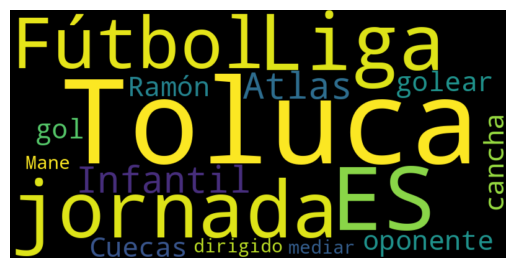

In [28]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generar nube de palabras para el primer artículo
texto = " ".join(voz["analisis"].iloc[1051]["lemas"])
wordcloud = WordCloud(width=800, height=400).generate(texto)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

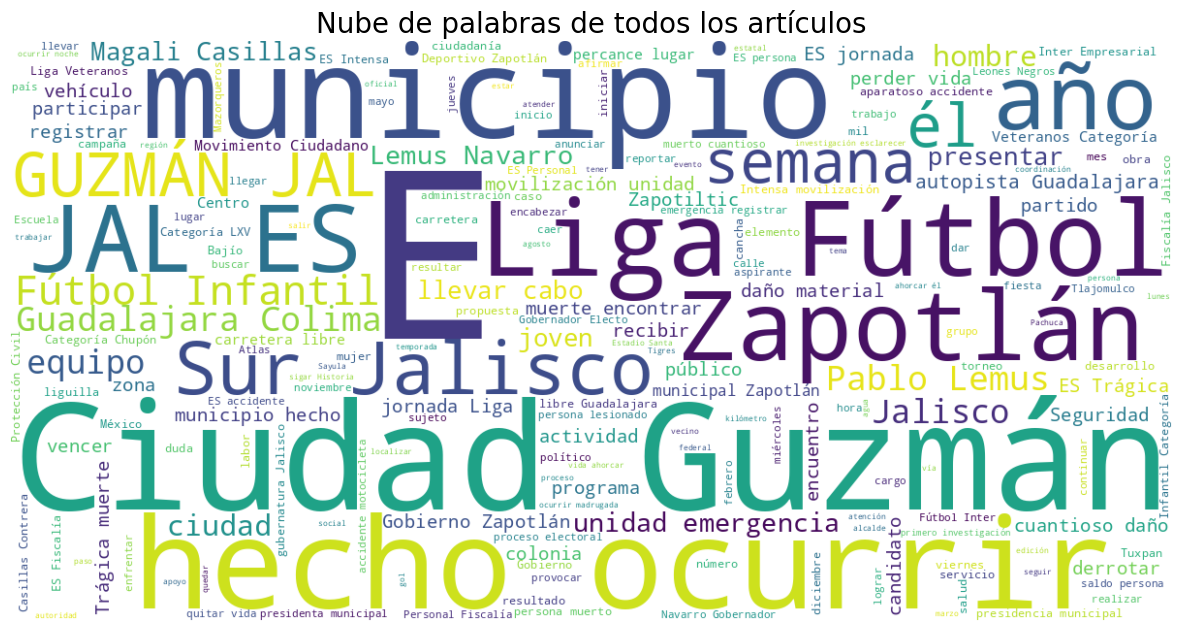

In [30]:


# Suponiendo que ya tienes el DataFrame df con la columna 'analisis' (lemas)
# Concatenar TODOS los lemas de todos los artículos
texto_completo = " ".join([lemma for sublist in voz["analisis"].apply(lambda x: x["lemas"]) for lemma in sublist])

# Opcional: Filtrar palabras irrelevantes (ej: preposiciones, artículos)
stopwords = ["de", "la", "el", "en", "y", "a", "los", "las", "del"]
texto_filtrado = " ".join([word for word in texto_completo.split() if word.lower() not in stopwords])

# Crear y mostrar la nube de palabras
wordcloud = WordCloud(
    width=1200,
    height=600,
    background_color='white',
    stopwords=stopwords,  # Filtra automáticamente
    max_words=200,
    colormap='viridis'  # Paleta de colores
).generate(texto_filtrado)

plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de palabras de todos los artículos', fontsize=20)
plt.show()

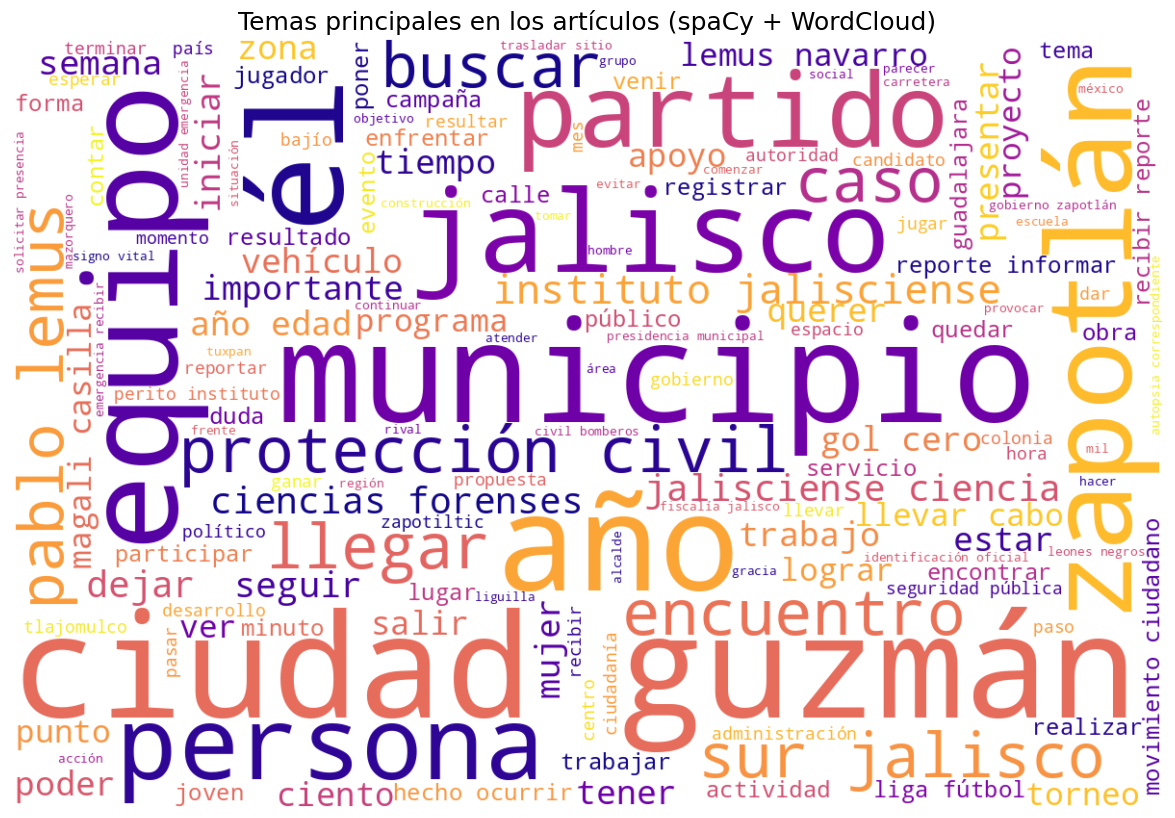

In [31]:
import spacy
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

# Carga el modelo de spaCy en español
nlp = spacy.load("es_core_news_md")

# 1. Procesar TODOS los artículos y extraer lemas relevantes
def procesar_texto(texto):
    doc = nlp(texto)
    # Filtra: lemas no stopwords, alfabéticos y longitud > 2
    lemas = [token.lemma_.lower() for token in doc
             if not token.is_stop and token.is_alpha and len(token.lemma_) > 2]
    return " ".join(lemas)

# Aplicar a todos los artículos (usando .progress_apply si tienes tqdm para barra de progreso)
texto_procesado = " ".join(voz["articulo"].apply(procesar_texto))

# 2. Generar la nube de palabras
wordcloud = WordCloud(
    width=1200,
    height=800,
    background_color='white',
    max_words=150,
    colormap='plasma',  # Prueba 'viridis', 'magma', 'inferno'
    stopwords=["ser", "haber"]  # Añade stopwords manualmente si es necesario
).generate(texto_procesado)

# 3. Mostrar y guardar
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Temas principales en los artículos (spaCy + WordCloud)', fontsize=18)
plt.savefig('nube_palabras_spacy.png', bbox_inches='tight', dpi=300)  # Guardar en HD
plt.show()

In [33]:
from transformers import pipeline
import pandas as pd

# 1. Cargar el modelo (se descarga la primera vez)
classifier = pipeline(
    "text-classification",
    model="finiteautomata/beto-sentiment-analysis",
    tokenizer="finiteautomata/beto-sentiment-analysis"
)

# 2. Función para clasificar (maneja textos largos)
def clasificar_sentimiento(texto):
    chunks = [texto[i:i+512] for i in range(0, len(texto), 512)]  # Divide en trozos de 512 tokens
    resultados = [classifier(chunk)[0]['label'] for chunk in chunks]
    # Cuenta votos (si hay trozos con distintos sentimientos)
    return max(set(resultados), key=resultados.count)

# 3. Aplicar al DataFrame (puede tardar en datasets grandes)
voz['sentimiento'] = voz['articulo'].apply(clasificar_sentimiento)

# Ver resultados
print(voz[['articulo', 'sentimiento']].head())

Device set to use cpu


                                            articulo sentimiento
0  *Autoridades de los tres niveles de gobierno t...         NEU
1  Sin duda alguna, los recientes cierres en las ...         NEG
2  Las potentes y muy alegres notas del estilo mu...         POS
3  , (ES).- Intensa movilización de unidades de e...         NEU
4  (ES).- El Gobierno Municipal de Zapotlán el Gr...         NEU


In [34]:
voz

,titulo,articulo,lugar,tags,contiene_ES,fecha,url,analisis,sentimiento
0,Dan Banderazo de Arranque al Operativo de Sema...,*Autoridades de los tres niveles de gobierno t...,,"Chava Zamora, jalisco, la voz del sur de jalis...",no,"abril 12th, 2025",https://www.lavozdelsur.com.mx/dan-banderazo-d...,"{'entidades': [('UEPCBJ', 'ORG'), ('Puesto de ...",NEU
1,La Falta de Vigilancia en las Carreteras,"Sin duda alguna, los recientes cierres en las ...",,"autopistas, Ciudad Guzmán, Falta de Agua, Oper...",no,"abril 11th, 2025",https://www.lavozdelsur.com.mx/la-falta-de-vig...,"{'entidades': [('Sur de Jalisco', 'LOC'), ('Se...",NEG
2,Banda Real de la Montaña Lleva su Música al Fe...,Las potentes y muy alegres notas del estilo mu...,,"Cultura, La Vos del Sur, Múscia Regional Mexic...",no,"abril 11th, 2025",https://www.lavozdelsur.com.mx/banda-real-de-l...,"{'entidades': [('Minatitlán', 'LOC'), ('Veracr...",POS
3,Muere un Hombre Atropellado en la Autopista Gu...,", (ES).- Intensa movilización de unidades de e...","GÓMEZ FARÍAS, JAL.","autopista, Ciuadad Guzmán, GómezFarías, muerto...",yes,"abril 10th, 2025",https://www.lavozdelsur.com.mx/muere-un-hombre...,"{'entidades': [('ES).-', 'LOC'), ('Autopista G...",NEU
4,Conforman Ayuntamiento Infantil 2025 Frente Au...,(ES).- El Gobierno Municipal de Zapotlán el Gr...,"CIUDAD GUZMÁN, JAL.","Ayuntamiento Infantil de Zapotlán, Cabildo Inf...",yes,"abril 9th, 2025",https://www.lavozdelsur.com.mx/conforman-ayunt...,"{'entidades': [('ES).-', 'LOC'), ('Gobierno Mu...",NEU
...,...,...,...,...,...,...,...,...,...
1051,"Toluca, Real Huescalapa y Rayos de Zapotiltic ...",", (ES).- En la jornada 9 en la Liga de Fútbol ...","CIUDAD GUZMÁN, JAL.","Ciudad Guzmán, deportes, futbol, huescalapa, I...",yes,"diciembre 27th, 2023",https://www.lavozdelsur.com.mx/toluca-real-hue...,"{'entidades': [('ES).-', 'LOC'), ('Liga de Fút...",NEU
1052,Abren Nevado a Visitantes Para Disfrutar el Pa...,*Habrá Restricciones Para Vehículos Compactos\...,,"Ciudad Guzmán, colima, la voz del sur de jalis...",yes,"diciembre 27th, 2023",https://www.lavozdelsur.com.mx/abren-nevado-a-...,{'entidades': [('Habrá Restricciones Para Vehí...,NEU
1053,Pablo Lemus Lleva Amplia Ventaja Sobre Otros P...,Durante el 9 y 13 de diciembre la empresa Tych...,,"Ciudad Guzmán, Elecciones 2024, encuestas, Gub...",no,"diciembre 26th, 2023",https://www.lavozdelsur.com.mx/pablo-lemus-lle...,"{'entidades': [('Tyché', 'MISC'), ('Movimiento...",NEU
1054,"Bajío, San José y Nuevos Valores Triunfan en l...",", (ES).- En el fútbol de la Categoría los equi...","CIUDAD GUZMÁN, JAL.","Bajío, Categoría Juvenil, Ciudad Guzmán, Club ...",yes,"diciembre 26th, 2023",https://www.lavozdelsur.com.mx/bajio-san-jose-...,"{'entidades': [('ES).-', 'LOC'), ('Categoría',...",NEG


In [35]:
# Guardar el resultado
voz.to_csv('analisis_vozdelsur.csv', index=False, encoding='utf-8-sig')